# Plot point contact data

## Libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import h5py as h5
from numpy import linalg as LA
import math

In [2]:
# To run interactive plot.
from matplotlib import interactive
interactive(True)

In [3]:
font = {'family' : 'Times New Roman',
        'size'   : 11}

matplotlib.rc('font', **font)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']

/tmp/ipykernel_4332/267178178.py:5: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
/tmp/ipykernel_4332/267178178.py:6: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']


## Plot multiple displacements

In [4]:
files=[
# # 'contact_r0.1_m2_h0.006_k3_sigma1.0.h5',
# # 'contact_r0.1_m2_¤h0.006_k3_sigma1.5.h5',
# # 'contact_r0.1_m2_h0.006_k5_sigma1.0.h5',
# # 'contact_r0.1_m2_h0.006_k5_sigma1.5.h5',
# # 'contact_r0.1_m2_h0.007_k3_sigma1.0.h5',
# # 'contact_r0.1_m2_h0.007_k3_sigma1.5.h5',
# # 'contact_r0.1_m2_h0.007_k5_sigma1.0.h5',
# # 'contact_r0.1_m2_h0.007_k5_sigma1.5.h5',
# # 'contact_r0.1_m2_h0.008_k3_sigma1.0.h5',
# # 'contact_r0.1_m2_h0.008_k3_sigma1.5.h5',
# # 'contact_r0.1_m2_h0.008_k5_sigma1.0.h5',
# # 'contact_r0.1_m2_h0.008_k5_sigma1.5.h5',
# # 'contact_r0.1_m2_h0.01_k3_sigma1.0.h5',
# # 'contact_r0.1_m2_h0.01_k3_sigma1.5.h5',
# # 'contact_r0.1_m2_h0.01_k5_sigma1.0.h5',
# # 'contact_r0.1_m2_h0.01_k5_sigma1.5.h5',
# # 'contact_r0.1_m4_h0.006_k3_sigma1.0.h5',
# # 'contact_r0.1_m4_h0.006_k3_sigma1.5.h5',
# # 'contact_r0.1_m4_h0.006_k5_sigma1.0.h5',
# # 'contact_r0.1_m4_h0.006_k5_sigma1.5.h5',
# # 'contact_r0.1_m4_h0.007_k3_sigma1.0.h5',
# # 'contact_r0.1_m4_h0.007_k3_sigma1.5.h5',
# # 'contact_r0.1_m4_h0.007_k5_sigma1.0.h5',
# # 'contact_r0.1_m4_h0.007_k5_sigma1.5.h5',
# # 'contact_r0.1_m4_h0.008_k3_sigma1.0.h5',
# # 'contact_r0.1_m4_h0.008_k3_sigma1.5.h5',
# # 'contact_r0.1_m4_h0.008_k5_sigma1.0.h5',
# # 'contact_r0.1_m4_h0.008_k5_sigma1.5.h5',
# # 'contact_r0.1_m4_h0.01_k3_sigma1.0.h5',
# # 'contact_r0.1_m4_h0.01_k3_sigma1.5.h5',
# # 'contact_r0.1_m4_h0.01_k5_sigma1.0.h5',
# # 'contact_r0.1_m4_h0.01_k5_sigma1.5.h5',
# # 'contact_r0.2_m2_h0.006_k3_sigma1.0.h5',
# # 'contact_r0.2_m2_h0.006_k3_sigma1.5.h5',
# # 'contact_r0.2_m2_h0.006_k5_sigma1.0.h5',
# # 'contact_r0.2_m2_h0.006_k5_sigma1.5.h5',
# # 'contact_r0.2_m2_h0.007_k3_sigma1.0.h5',
# # 'contact_r0.2_m2_h0.007_k3_sigma1.5.h5',
# # 'contact_r0.2_m2_h0.007_k5_sigma1.0.h5',
# # 'contact_r0.2_m2_h0.007_k5_sigma1.5.h5',
# # 'contact_r0.2_m2_h0.008_k3_sigma1.0.h5',
# # 'contact_r0.2_m2_h0.008_k3_sigma1.5.h5',
# # 'contact_r0.2_m2_h0.008_k5_sigma1.0.h5',
# # 'contact_r0.2_m2_h0.008_k5_sigma1.5.h5',
# # 'contact_r0.2_m2_h0.01_k3_sigma1.0.h5',
# # 'contact_r0.2_m2_h0.01_k3_sigma1.5.h5',
# # 'contact_r0.2_m2_h0.01_k5_sigma1.0.h5',
# # 'contact_r0.2_m2_h0.01_k5_sigma1.5.h5',
# # 'contact_r0.2_m4_h0.006_k3_sigma1.0.h5',
# # 'contact_r0.2_m4_h0.006_k3_sigma1.5.h5',
# # 'contact_r0.2_m4_h0.006_k5_sigma1.0.h5',
# # 'contact_r0.2_m4_h0.006_k5_sigma1.5.h5',
# # 'contact_r0.2_m4_h0.007_k3_sigma1.0.h5',
# # 'contact_r0.2_m4_h0.007_k3_sigma1.5.h5',
# # 'contact_r0.2_m4_h0.007_k5_sigma1.0.h5',
# # 'contact_r0.2_m4_h0.007_k5_sigma1.5.h5',
# # 'contact_r0.2_m4_h0.008_k3_sigma1.0.h5',
# # 'contact_r0.2_m4_h0.008_k3_sigma1.5.h5',
# # 'contact_r0.2_m4_h0.008_k5_sigma1.0.h5',
# # 'contact_r0.2_m4_h0.008_k5_sigma1.5.h5',
# # 'contact_r0.2_m4_h0.01_k3_sigma1.0.h5',
# # 'contact_r0.2_m4_h0.01_k3_sigma1.5.h5',
# # 'contact_r0.2_m4_h0.01_k5_sigma1.0.h5',
# # 'contact_r0.2_m4_h0.01_k5_sigma1.5.h5',
# # 'contact_r0.3_m2_h0.006_k3_sigma1.0.h5',
# # 'contact_r0.3_m2_h0.006_k3_sigma1.5.h5',
# # 'contact_r0.3_m2_h0.006_k5_sigma1.0.h5',
# # 'contact_r0.3_m2_h0.006_k5_sigma1.5.h5',
# # 'contact_r0.3_m2_h0.007_k3_sigma1.0.h5',
# # 'contact_r0.3_m2_h0.007_k3_sigma1.5.h5',
# # 'contact_r0.3_m2_h0.007_k5_sigma1.0.h5',
# # 'contact_r0.3_m2_h0.007_k5_sigma1.5.h5',
# # 'contact_r0.3_m2_h0.008_k3_sigma1.0.h5',
# # 'contact_r0.3_m2_h0.008_k3_sigma1.5.h5',
# # 'contact_r0.3_m2_h0.008_k5_sigma1.0.h5',
# # 'contact_r0.3_m2_h0.008_k5_sigma1.5.h5',
# # 'contact_r0.3_m2_h0.01_k3_sigma1.0.h5',
# # 'contact_r0.3_m2_h0.01_k3_sigma1.5.h5',
# # 'contact_r0.3_m2_h0.01_k5_sigma1.0.h5',
# # 'contact_r0.3_m2_h0.01_k5_sigma1.5.h5',
# # 'contact_r0.3_m4_h0.006_k3_sigma1.0.h5',
# # 'contact_r0.3_m4_h0.006_k3_sigma1.5.h5',
# # 'contact_r0.3_m4_h0.006_k5_sigma1.0.h5',
# # 'contact_r0.3_m4_h0.006_k5_sigma1.5.h5',
# # 'contact_r0.3_m4_h0.007_k3_sigma1.0.h5',
# # 'contact_r0.3_m4_h0.007_k3_sigma1.5.h5',
# # 'contact_r0.3_m4_h0.007_k5_sigma1.0.h5',
# # 'contact_r0.3_m4_h0.007_k5_sigma1.5.h5',
# # 'contact_r0.3_m4_h0.008_k3_sigma1.0.h5',
# # 'contact_r0.3_m4_h0.008_k3_sigma1.5.h5',
# # 'contact_r0.3_m4_h0.008_k5_sigma1.0.h5',
# # 'contact_r0.3_m4_h0.008_k5_sigma1.5.h5',
# # 'contact_r0.3_m4_h0.01_k3_sigma1.0.h5',
# # 'contact_r0.3_m4_h0.01_k3_sigma1.5.h5',
# # 'contact_r0.3_m4_h0.01_k5_sigma1.0.h5',
# # 'contact_r0.3_m4_h0.01_k5_sigma1.5.h5',
# # 'contact_r0.4_m2_h0.006_k3_sigma1.0.h5',
# # 'contact_r0.4_m2_h0.006_k3_sigma1.5.h5',
# # 'contact_r0.4_m2_h0.006_k5_sigma1.0.h5',
# # 'contact_r0.4_m2_h0.006_k5_sigma1.5.h5',
# # 'contact_r0.4_m2_h0.007_k3_sigma1.0.h5',
# # 'contact_r0.4_m2_h0.007_k3_sigma1.5.h5',
# # 'contact_r0.4_m2_h0.007_k5_sigma1.0.h5',
# # 'contact_r0.4_m2_h0.007_k5_sigma1.5.h5',
# # 'contact_r0.4_m2_h0.008_k3_sigma1.0.h5',
# # 'contact_r0.4_m2_h0.008_k3_sigma1.5.h5',
# # 'contact_r0.4_m2_h0.008_k5_sigma1.0.h5',
# # 'contact_r0.4_m2_h0.008_k5_sigma1.5.h5',
# # 'contact_r0.4_m2_h0.01_k3_sigma1.0.h5',
# # 'contact_r0.4_m2_h0.01_k3_sigma1.5.h5',
# # 'contact_r0.4_m2_h0.01_k5_sigma1.0.h5',
# # 'contact_r0.4_m2_h0.01_k5_sigma1.5.h5',
# # 'contact_r0.4_m4_h0.006_k3_sigma1.0.h5',
# # 'contact_r0.4_m4_h0.006_k3_sigma1.5.h5',
# # 'contact_r0.4_m4_h0.006_k5_sigma1.0.h5',
# # 'contact_r0.4_m4_h0.006_k5_sigma1.5.h5',
# # 'contact_r0.4_m4_h0.007_k3_sigma1.0.h5',
# # 'contact_r0.4_m4_h0.007_k3_sigma1.5.h5',
# # 'contact_r0.4_m4_h0.007_k5_sigma1.0.h5',
# # 'contact_r0.4_m4_h0.007_k5_sigma1.5.h5',
# # 'contact_r0.4_m4_h0.008_k3_sigma1.0.h5',
# # 'contact_r0.4_m4_h0.008_k3_sigma1.5.h5',
# # 'contact_r0.4_m4_h0.008_k5_sigma1.0.h5',
# # 'contact_r0.4_m4_h0.008_k5_sigma1.5.h5',
# # 'contact_r0.4_m4_h0.01_k3_sigma1.0.h5',
# # 'contact_r0.4_m4_h0.01_k3_sigma1.5.h5',
# # 'contact_r0.4_m4_h0.01_k5_sigma1.0.h5',
# # 'contact_r0.4_m4_h0.01_k5_sigma1.5.h5',
# # 'contact_r0.5_m2_h0.006_k3_sigma1.0.h5',
# # 'contact_r0.5_m2_h0.006_k3_sigma1.5.h5',
# # 'contact_r0.5_m2_h0.006_k5_sigma1.0.h5',
# # 'contact_r0.5_m2_h0.006_k5_sigma1.5.h5',
# # 'contact_r0.5_m2_h0.007_k3_sigma1.0.h5',
# # 'contact_r0.5_m2_h0.007_k3_sigma1.5.h5',
# # 'contact_r0.5_m2_h0.007_k5_sigma1.0.h5',
# # 'contact_r0.5_m2_h0.007_k5_sigma1.5.h5',
# # 'contact_r0.5_m2_h0.008_k3_sigma1.0.h5',
# # 'contact_r0.5_m2_h0.008_k3_sigma1.5.h5',
# # 'contact_r0.5_m2_h0.008_k5_sigma1.0.h5',
# # 'contact_r0.5_m2_h0.008_k5_sigma1.5.h5',
# # 'contact_r0.5_m2_h0.01_k3_sigma1.0.h5',
# # 'contact_r0.5_m2_h0.01_k3_sigma1.5.h5',
# # 'contact_r0.5_m2_h0.01_k5_sigma1.0.h5',
# # 'contact_r0.5_m2_h0.01_k5_sigma1.5.h5',
# # 'contact_r0.5_m4_h0.006_k3_sigma1.0.h5',
# # 'contact_r0.5_m4_h0.006_k3_sigma1.5.h5',
# # 'contact_r0.5_m4_h0.006_k5_sigma1.0.h5',
# # 'contact_r0.5_m4_h0.006_k5_sigma1.5.h5',
# # 'contact_r0.5_m4_h0.007_k3_sigma1.0.h5',
# # 'contact_r0.5_m4_h0.007_k3_sigma1.5.h5',
# # 'contact_r0.5_m4_h0.007_k5_sigma1.0.h5',
# # 'contact_r0.5_m4_h0.007_k5_sigma1.5.h5',
# # 'contact_r0.5_m4_h0.008_k3_sigma1.0.h5',
# 'contact_r0.5_m4_h0.008_k3_sigma1.5.h5',
# # 'contact_r0.5_m4_h0.008_k5_sigma1.0.h5',
# 'contact_r0.5_m4_h0.008_k5_sigma1.5.h5',
# # 'contact_r0.5_m4_h0.01_k3_sigma1.0.h5',
# 'contact_r0.5_m4_h0.01_k3_sigma1.5.h5',
# # 'contact_r0.5_m4_h0.01_k5_sigma1.0.h5',
# # 'contact_r0.5_m4_h0.01_k5_sigma1.5.h5',
# # 'contact_r0.6_m2_h0.006_k3_sigma1.0.h5',
# # 'contact_r0.6_m2_h0.006_k3_sigma1.5.h5',
# # 'contact_r0.6_m2_h0.006_k5_sigma1.0.h5',
# # 'contact_r0.6_m2_h0.006_k5_sigma1.5.h5',
# # 'contact_r0.6_m2_h0.007_k3_sigma1.0.h5',
# # 'contact_r0.6_m2_h0.007_k3_sigma1.5.h5',
# # 'contact_r0.6_m2_h0.007_k5_sigma1.0.h5',
# # 'contact_r0.6_m2_h0.007_k5_sigma1.5.h5',
# # 'contact_r0.6_m2_h0.008_k3_sigma1.0.h5',
# # 'contact_r0.6_m2_h0.008_k3_sigma1.5.h5',
# # 'contact_r0.6_m2_h0.008_k5_sigma1.0.h5',
# # 'contact_r0.6_m2_h0.008_k5_sigma1.5.h5',
# # 'contact_r0.6_m2_h0.01_k3_sigma1.0.h5',
# # 'contact_r0.6_m2_h0.01_k3_sigma1.5.h5',
# # 'contact_r0.6_m2_h0.01_k5_sigma1.0.h5',
# # 'contact_r0.6_m2_h0.01_k5_sigma1.5.h5',
# # 'contact_r0.6_m4_h0.006_k3_sigma1.0.h5',
# # 'contact_r0.6_m4_h0.006_k3_sigma1.5.h5',
# # 'contact_r0.6_m4_h0.006_k5_sigma1.0.h5',
# # 'contact_r0.6_m4_h0.006_k5_sigma1.5.h5',
# # 'contact_r0.6_m4_h0.007_k3_sigma1.0.h5',
# # 'contact_r0.6_m4_h0.007_k3_sigma1.5.h5',
# # 'contact_r0.6_m4_h0.007_k5_sigma1.0.h5',
# # 'contact_r0.6_m4_h0.007_k5_sigma1.5.h5',
# # 'contact_r0.6_m4_h0.008_k3_sigma1.0.h5',
# # 'contact_r0.6_m4_h0.008_k3_sigma1.5.h5',
# # 'contact_r0.6_m4_h0.008_k5_sigma1.0.h5',
# # 'contact_r0.6_m4_h0.008_k5_sigma1.5.h5',
# # 'contact_r0.6_m4_h0.01_k3_sigma1.0.h5',
# 'contact_r0.6_m4_h0.01_k3_sigma1.5.h5',
# # 'contact_r0.6_m4_h0.01_k5_sigma1.0.h5',
# 'contact_r0.6_m4_h0.01_k5_sigma1.5.h5'
]

error_list = []
for f in files:
    print(f)
    data_filepath = '../data/{}'.format(f)
    data = h5.File(data_filepath, 'r')
    try:
        displacement_h = data['displacement_hybrid'][:]
        displacement_mag_h = [np.sqrt(x*x + y*y + z*z) for x, y,z in zip(displacement_h[0], displacement_h[1], displacement_h[2])]
        displacement_mon = data['displacement_mon'][:]
        displacement_mag_mon = [np.sqrt(x*x + y*y + z*z) for x, y,z in zip(displacement_mon[0], displacement_mon[1], displacement_mon[2])]

        for i in range(len(displacement_mag_h)):
            if math.isnan(displacement_mag_h[i]):
                displacement_mag_h[i] = 0.0
        for i in range(len(displacement_mag_mon)):
            if math.isnan(displacement_mag_mon[i]):
                displacement_mag_mon[i] = 0.0

        positions = data['domain/pos'][:]

        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(1, 2, 1, projection='3d')
        p = ax.scatter(positions[0], positions[1], positions[2], c=displacement_mag_h, cmap='jet', s = 5)
        cbar = fig.colorbar(p, ax=ax, shrink=0.6, label=r"$\left\|\mathbf{u} \right\|$", ticks=np.linspace(min(displacement_mag_h), max(displacement_mag_h), 7))
        # cbar.ax.set_ylabel()

        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')
        ax.set_zlabel('$z$')
        ax.grid(True, which='both')
        ax.set_title('hybrid')
        # ax.set_title('displacement magnitude')
        ax.view_init(elev=30., azim=40)


        ax = fig.add_subplot(1, 2, 2, projection='3d')
        p = ax.scatter(positions[0], positions[1], positions[2], c=displacement_mag_mon, cmap='jet', s = 5)
        cbar = fig.colorbar(p, ax=ax, shrink=0.6, label=r"$\left\|\mathbf{u} \right\|$", ticks=np.linspace(min(displacement_mag_mon), max(displacement_mag_mon), 7))
        # cbar.ax.set_ylabel()

        ax.set_xlabel('$x$')
        ax.set_ylabel('$y$')
        ax.set_zlabel('$z$')
        ax.set_title('mon')
        ax.grid(True, which='both')
        # ax.set_title('displacement magnitude')
        ax.view_init(elev=30., azim=40)


        plt.show()
    except:
        error_list.append(f)


## Import data

In [5]:
filepath = '../data/contact_r0.5_m4_h0.008_k5_sigma1.5.h5'
data = h5.File(filepath, 'r')

In [6]:
groups = list(data.keys())
groups.remove('conf')
print(groups)

['displacement_hybrid', 'displacement_mon', 'displacement_phs', 'domain', 'nodes_rbf', 'nodes_wls', 'time']


## Plot displacements

In [7]:
displacement = data['displacement_hybrid'][:]
displacement_mag = [np.sqrt(x*x + y*y + z*z) for x, y,z in zip(displacement[0], displacement[1], displacement[2])]

positions = data['domain/pos'][:]

# Obtain node ids.
nodes_phs = data['nodes_rbf'][:]
nodes_wls = data['nodes_wls'][:]
total_nodes = len(nodes_phs) + len(nodes_wls)

positions_mon = positions[:,nodes_wls]
positions_phs = positions[:,nodes_phs]

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


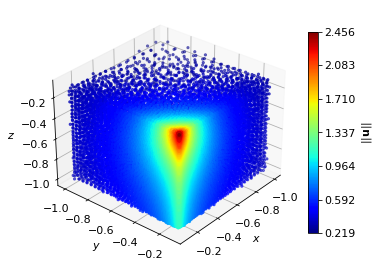

In [8]:
fig = plt.figure(figsize=(5, 5))

# set up the axes for the first plot
# ax = fig.add_subplot(1, 1, 1, projection='3d')

# # Undeformed mesh.
# ax.scatter(positions_mon[0], positions_mon[1], positions_mon[2], label='WLS', s=1)
# ax.scatter(positions_phs[0], positions_phs[1], positions_phs[2], label='RBF-FD', s=1)

# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
# ax.set_zlabel('$z$')
# ax.grid(True, which='both')
# plt.legend()
# # ax.set_title('undeformed')
# ax.view_init(elev=30., azim=40)

# # # Deformed.
# ax = axs[1]
ax = fig.add_subplot(1, 1, 1, projection='3d')
p = ax.scatter(positions[0], positions[1], positions[2], c=displacement_mag, cmap='jet', s = 5)
cbar = fig.colorbar(p, ax=ax, shrink=0.6, label=r"$\left\|\left\|\mathbf{u} \right\|\right\|$", ticks=np.linspace(min(displacement_mag), max(displacement_mag), 7))
# cbar.ax.set_ylabel()

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.grid(True, which='both')
# ax.set_title('displacement magnitude')
ax.view_init(elev=30., azim=40)


fig.tight_layout()
if 1:
    plt.savefig('../results/contact.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

## Statistics

In [9]:
young = 1
nu = 0.33
PP = -1
lam = young * nu / (1 - 2 * nu) / (1 + nu)
mu = young / 2 / (1 + nu)

def analytic(pos):
    x = pos[0]
    y = pos[1]
    z = pos[2]

    r = np.sqrt(x * x + y * y)
    c = x / r
    s = y / r
    R = np.sqrt(x * x + y * y + z * z)

    u = PP * r / 4 / np.pi / mu * (z / R / R / R - (1 - 2 * nu) / (R * (R + z)))
    w = PP/ 4 / np.pi / mu * (z * z / R / R / R + 2 * (1 - nu) / R)
    return [u*c, u*s, w]


In [10]:
displacement_analytic = [analytic([x, y, z]) for x, y,z in zip(positions[0], positions[1], positions[2])]
displacement_analytic_mag = [np.sqrt(x*x + y*y + z*z) for x,y,z in displacement_analytic]

In [11]:
errors = []
times = []
basis_types = ['mon', 'phs', 'hybrid']
for basis_type in basis_types:
    displacement = data['displacement_{}'.format(basis_type)][:]
    displacement_mag = [np.sqrt(x*x + y*y + z*z) for x, y,z in zip(displacement[0], displacement[1], displacement[2])]

    err = np.array(displacement_analytic_mag) - np.array(displacement_mag)
    e_inf = LA.norm(err, np.inf) / LA.norm(displacement_analytic_mag, np.inf)

    print(basis_type, e_inf)

mon nan
phs 9.48260770513733e-05
hybrid 0.0023706012834508253


### Timers

In [12]:
list(data['time'].attrs.keys())

['matrix_hybrid_run_000-end',
 'matrix_mon_run_000-shapes_phs_run_000',
 'matrix_phs_run_000-shapes_hybrid_run_000',
 'shapes_hybrid_run_000-matrix_hybrid_run_000',
 'shapes_mon_run_000-matrix_mon_run_000',
 'shapes_phs_run_000-matrix_phs_run_000',
 'start-shapes_mon_run_000',
 'total']

In [13]:
for basis_type in basis_types:
    time = data['time'].attrs['shapes_{}_run_000-matrix_{}_run_000'.format(basis_type, basis_type)]
    print(basis_type, time)


mon 4.735971306
phs 8.221472365
hybrid 6.152887553


### Percentage

In [14]:
print("% of WLS nodes: ", len(positions_mon[0]) / total_nodes * 100)
print("% of RBF-FD nodes: ", len(positions_phs[0]) / total_nodes * 100)

% of WLS nodes:  65.71488338039954
% of RBF-FD nodes:  34.28511661960046
